In [17]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, recall_score, accuracy_score, precision_score, matthews_corrcoef
from sklearn.metrics import precision_recall_curve, roc_auc_score, roc_curve

In [19]:
actual = [random.randint(0, 1) for i in range(20)]
predicted = actual[0:8] + [1, 0, 0, 1] + actual[12:]
print("actual : " , actual)
print("predicted : ", predicted)

actual :  [1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0]
predicted :  [1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0]


In [20]:
tn, fp, fn, tp = confusion_matrix(actual, predicted).ravel()
print("tp : ", tp)
print("tn: ", tn)
print("fp : ", fp)
print("fn : ", fn)

tp :  10
tn:  9
fp :  0
fn :  1


In [23]:
def accuracy(tp, tn, fp, fn):
    return (tp+tn)/(tp+tn+fp+fn)

def precision(tp, fp):
    return tp/tp+fp

def recall(tp, fn):
    return tp/tp+tn

def f1score(tp, fp, fn):
    p = precision(tp, fp)
    r = recall(tp, fn)
    return (p * r)/(p + r)

def matthews(tp, tn, fp, fn):
    return ((tp*tn) - (fp*fn)) / (((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)) ** (1/2))

In [25]:
my_accuracy = accuracy(tp, tn, fp, fn)
sk_accuracy = accuracy_score(actual, predicted)
print("my accuracy = ", my_accuracy)
print("sklearn accuracy = ", sk_accuracy)

my_precision = precision(tp, fp)
sk_precision = precision_score(actual, predicted)
print("my  precision= ", my_precision)
print("sklearn precision = ", sk_precision)

my_recall = recall(tp, fn)
sk_recall = recall_score(actual, predicted)
print("my  recall= ", my_recall)
print("sklearn recall = ", sk_recall)

my_f1score = f1score(tp, fp, fn)
sk_f1score = f1_score(actual, predicted)
print("my  f1score= ", my_f1score)
print("sklearn f1score = ", sk_f1score)

my_matthews = matthews(tp, tn, fp, fn)
sk_matthews = matthews_corrcoef(actual, predicted)
print("my matthews= ", my_matthews)
print("sklearn matthews = ", sk_matthews)

my accuracy =  0.95
sklearn accuracy =  0.95
my  precision=  1.0
sklearn precision =  1.0
my  recall=  10.0
sklearn recall =  0.9090909090909091
my  f1score=  0.9090909090909091
sklearn f1score =  0.9523809523809523
my matthews=  0.9045340337332909
sklearn matthews =  0.9045340337332909


<AxesSubplot: >

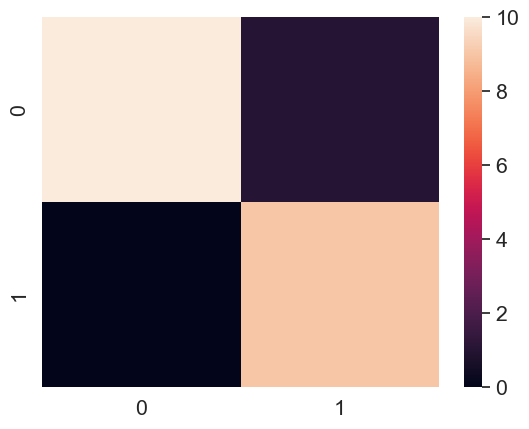

In [26]:
sk_array = [[tp, fn], [fp, tn]]
df = pd.DataFrame(sk_array, range(2), range(2))
sns.set(font_scale = 1.4)
sns.heatmap(df)

In [28]:
print("sklearn confusion matrix")
print("            predcited values")
print("true value   tp    fn")
print("             fp    tn")
print()
print("            predcited values")
print(f"true value   {tp}    {fn}")
print(f"              {fp}    {tn}")

sklearn confusion matrix
            predcited values
true value   tp    fn
             fp    tn

            predcited values
true value   10    1
              0    9


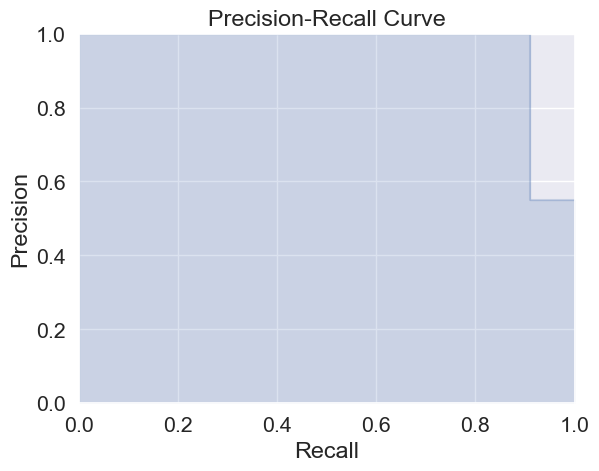

In [33]:
precision_curve, recall_curve, _ = precision_recall_curve(actual, predicted)
plt.step(recall_curve, precision_curve, alpha=0.2, where="post")
plt.fill_between(recall_curve, precision_curve, color = "b", alpha = 0.2, step = "post")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title("Precision-Recall Curve")
plt.show()

sklearn ROC-AUC Score :  0.9545454545454546


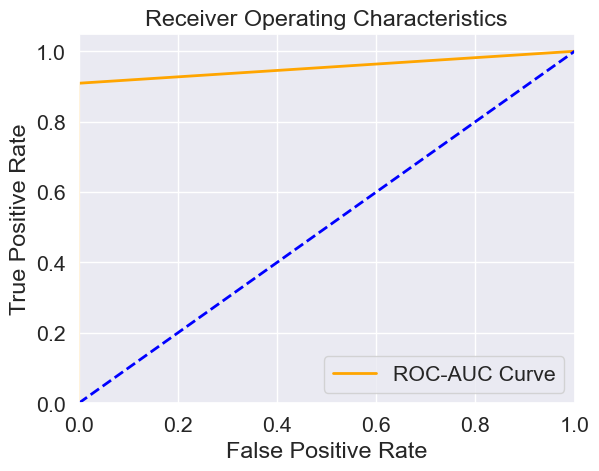

In [38]:
print("sklearn ROC-AUC Score : ", roc_auc_score(actual,predicted))
fpr, tpr, _ = roc_curve(actual,predicted)
plt.figure()
plt.plot(fpr,tpr, color = "orange", lw = 2, label = "ROC-AUC Curve")
plt.plot([0,1], [0,1], color = "blue", lw = 2, linestyle = "--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics")
plt.legend(loc = "lower right")
plt.show()